Question 1: Polynomial Regression

Question 1 part a 

In [1]:
import pandas as pd


file_path = r'C:\Users\krmch\OneDrive\Desktop\AutoMpg.csv'  


df = pd.read_csv(file_path)


df.head()

,horsepower,mpg,cylinders,displacement,weight,acceleration,model year,origin,car name
0,130.0,18.0,8,307.0,3504,12.0,70,1.0,chevrolet chevelle malibu
1,165.0,15.0,8,350.0,3693,11.5,70,1.0,buick skylark 320
2,150.0,18.0,8,318.0,3436,11.0,70,1.0,plymouth satellite
3,150.0,16.0,8,304.0,3433,12.0,70,1.0,amc rebel sst
4,140.0,17.0,8,302.0,3449,10.5,70,1.0,ford torino


In [2]:


df.fillna(df.median(), inplace=True)

# method to remove outliers 
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]


df.drop_duplicates(inplace=True)


C:\Users\krmch\AppData\Local\Temp\ipykernel_14600\1189570567.py:2: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.fillna(df.median(), inplace=True)
C:\Users\krmch\AppData\Local\Temp\ipykernel_14600\1189570567.py:5: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = df.quantile(0.25)
C:\Users\krmch\AppData\Local\Temp\ipykernel_14600\1189570567.py:6: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = df.quant

In [3]:
origin_map = {1: 'USA', 2: 'Europe', 3: 'Japan'}
df['origin'] = df['origin'].map(origin_map)



# show 
df.head()


,horsepower,mpg,cylinders,displacement,weight,acceleration,model year,origin,car name
0,130.0,18.0,8,307.0,3504,12.0,70,USA,chevrolet chevelle malibu
1,165.0,15.0,8,350.0,3693,11.5,70,USA,buick skylark 320
2,150.0,18.0,8,318.0,3436,11.0,70,USA,plymouth satellite
3,150.0,16.0,8,304.0,3433,12.0,70,USA,amc rebel sst
4,140.0,17.0,8,302.0,3449,10.5,70,USA,ford torino


In [4]:
# 5. There are no missing values for the car name and after a 
# visual inspection of the csv file they all seem to have names 
# as such there is no need to preprocess for cars without the car name 

df['brand'] = df['car name'].str.split().str[0]
misspellings = {
    'chevroelt': 'chevrolet', 'chevy': 'chevrolet',
    'vokswagen': 'volkswagen', 'vw': 'volkswagen',
    'hi': 'harvester', 'maxda': 'mazda',
    'toyouta': 'toyota', 'mercedes-benz': 'mercedes'
}
df['brand'] = df['brand'].replace(misspellings)

In [5]:
df.head()


,horsepower,mpg,cylinders,displacement,weight,acceleration,model year,origin,car name,brand
0,130.0,18.0,8,307.0,3504,12.0,70,USA,chevrolet chevelle malibu,chevrolet
1,165.0,15.0,8,350.0,3693,11.5,70,USA,buick skylark 320,buick
2,150.0,18.0,8,318.0,3436,11.0,70,USA,plymouth satellite,plymouth
3,150.0,16.0,8,304.0,3433,12.0,70,USA,amc rebel sst,amc
4,140.0,17.0,8,302.0,3449,10.5,70,USA,ford torino,ford


Question 1 part b 

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


X = df[['horsepower']]
y = df['mpg']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

y_pred_linear = linear_model.predict(X_test)
rmse_linear = mean_squared_error(y_test, y_pred_linear, squared=False)
r2_linear = r2_score(y_test, y_pred_linear)

rmse_linear, r2_linear


(4.644276274094842, 0.6286362202130638)

RMSE is a measure of the average magnitude of the errors between the predicted values and the actual values. Lower RMSE values indicate a better fit.

R² is a measure of how well the regression predictions approximate the real data points. Higher R² values generally indicate a better fit

question 1 part c 

In [7]:
from sklearn.preprocessing import PolynomialFeatures


degrees = [2, 5, 10, 20]
poly_results = {}

for degree in degrees:

    
    
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(X)

  
    X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(X_poly, y, test_size=0.3, random_state=42)


    poly_model = LinearRegression()
    poly_model.fit(X_train_poly, y_train_poly)

    
    
    y_pred_poly = poly_model.predict(X_test_poly)
    rmse_poly = mean_squared_error(y_test_poly, y_pred_poly, squared=False)
    r2_poly = r2_score(y_test_poly, y_pred_poly)


    poly_results[degree] = {'RMSE': rmse_poly, 'R2': r2_poly}

poly_results


{2: {'RMSE': 4.583943747768146, 'R2': 0.6382221203787379},
 5: {'RMSE': 4.494109189157933, 'R2': 0.6522631708106966},
 10: {'RMSE': 4.587143751506527, 'R2': 0.6377168372789077},
 20: {'RMSE': 5.4335588445862815, 'R2': 0.4916858498138521}}

As the degree of the polynomial increases, there is a change in the performance metrics. At first the RMSE decreases and R² increases which suggests improved model fit. However, at degree 20  the model's performance deteriorates, indicating potential overfitting.

question 1 part d 

C:\Users\krmch\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


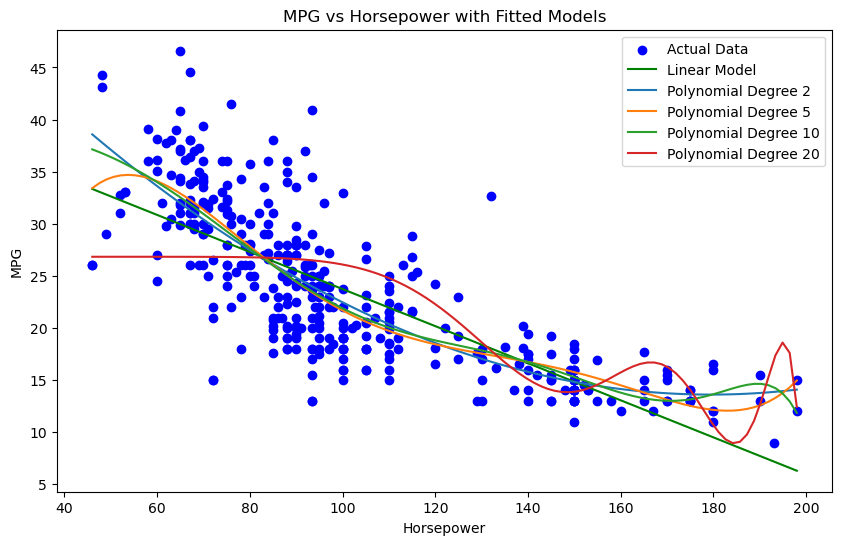

In [8]:
import matplotlib.pyplot as plt
import numpy as np


plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Actual Data')


x_range = np.linspace(X.min(), X.max(), 100)
y_pred_linear_plot = linear_model.predict(x_range)
plt.plot(x_range, y_pred_linear_plot, label='Linear Model', color='green')


for degree in degrees:
    poly = PolynomialFeatures(degree=degree)
    X_poly_plot = poly.fit_transform(x_range)
    y_pred_poly_plot = LinearRegression().fit(poly.fit_transform(X), y).predict(X_poly_plot)
    plt.plot(x_range, y_pred_poly_plot, label=f'Polynomial Degree {degree}')

plt.xlabel('Horsepower')
plt.ylabel('MPG')
plt.title('MPG vs Horsepower with Fitted Models')
plt.legend()
plt.show()


Increasing the model complexity initially improves the fit of the data as seen in the transition from linear to polynomial models (degrees 2 and 5). However too much complexity leads to overfitting i.e worse performance. The degree 5 model balances data fitting while avoiding overfitting making it suitable and it also has lower RMSE and higher R2 values.

Question 2 

Question 2 part A


In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler


X = df[['horsepower', 'displacement', 'weight', 'acceleration']]
y = df['mpg']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# first do it before normalising 

mlr_model = LinearRegression()
mlr_model.fit(X_train, y_train)


y_pred = mlr_model.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)





In [13]:
# then do it after normalising 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


mlr_model_scaled = LinearRegression()
mlr_model_scaled.fit(X_train_scaled, y_train)


y_pred_scaled = mlr_model_scaled.predict(X_test_scaled)
rmse_scaled = mean_squared_error(y_test, y_pred_scaled, squared=False)
r2_scaled = r2_score(y_test, y_pred_scaled)


In [14]:
#results 

(rmse, r2, rmse_scaled, r2_scaled)

(3.8618577820058984,
 0.7432230697728914,
 3.8618577820058992,
 0.7432230697728914)

normalisation didnt affect RMSE and R2 because they are scale invariant.

question 2 part b

In [15]:
coefficients = pd.DataFrame(mlr_model.coef_, X.columns, columns=['Coefficient'])

print(coefficients)

              Coefficient
horsepower      -0.051838
displacement    -0.005162
weight          -0.005307
acceleration    -0.125313


since horsepower and acceleration have the largest absolute value of their coefficients that means they are the most influential 

question 2 part c 

In [17]:
from sklearn.decomposition import PCA


pca = PCA(n_components=1)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)



mlr_model_pca = LinearRegression()
mlr_model_pca.fit(X_train_pca, y_train)




y_pred_pca = mlr_model_pca.predict(X_test_pca)
rmse_pca = mean_squared_error(y_test, y_pred_pca, squared=False)
r2_pca = r2_score(y_test, y_pred_pca)

(rmse_pca, r2_pca)


(4.3875329864501005, 0.6685605197652555)

discussion 

the increase in RMSE from 3.86 to 4.39 and decrease in r2 from 0.7432 to 0.6686 indicates lower prediction accuracy. This is probably caused by PCA reducing the dimensionality of the data i.e its relying on a single derived feature for prediction .

question 2d 

In [18]:
df_new = pd.read_csv(r'C:\Users\krmch\OneDrive\Desktop\NEWAutoMpg.csv')



df_new = pd.get_dummies(df_new, columns=['origin'], drop_first=True)


X_extended = df_new[['horsepower', 'displacement', 'weight', 'acceleration', 'cylinders', 'origin_Japan', 'origin_USA']]
y = df_new['mpg']


X_train_ext, X_test_ext, y_train, y_test = train_test_split(X_extended, y, test_size=0.3, random_state=42)

mlr_model_extended = LinearRegression()
mlr_model_extended.fit(X_train_ext, y_train)


y_pred_extended = mlr_model_extended.predict(X_test_ext)
rmse_extended = mean_squared_error(y_test, y_pred_extended, squared=False)
r2_extended = r2_score(y_test, y_pred_extended)

(rmse_extended, r2_extended)


(3.926804620662358, 0.734513747800546)

if we compare these results to the previous model without these added categorical variables we notice a small increase of RMSE and a small decrease in R2 indicating lower performance. Which means the added complexity from origin and cylinders did not provide an increase in the prediction performance 

question 2 part e 

In [19]:
df_new = pd.get_dummies(df_new, columns=['brand'], drop_first=True)


X_full = df_new.drop(['mpg', 'car name'], axis=1)
y = df_new['mpg']


X_train_full, X_test_full, y_train, y_test = train_test_split(X_full, y, test_size=0.3, random_state=42)


mlr_model_full = LinearRegression()
mlr_model_full.fit(X_train_full, y_train)


y_pred_full = mlr_model_full.predict(X_test_full)
rmse_full = mean_squared_error(y_test, y_pred_full, squared=False)
r2_full = r2_score(y_test, y_pred_full)

(rmse_full, r2_full)


(3.5417615899893544, 0.7840256888384167)

These results indicate that adding model_year and brand has led to an improvement in model performance as the r2 is higher and RMSE lower 

PART B Classification decision trees.

In [20]:
import pandas as pd
import numpy as np


file_path = r'C:\Users\krmch\OneDrive\Desktop\222AutoMpg.csv'  


data = pd.read_csv(file_path)

data['FEGroup'] = pd.qcut(data['mpg'], q=[0, 0.1, 1], labels=['high-fuel', 'low-fuel'])

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder


features = ['horsepower', 'weight', 'acceleration', 'cylinders', 'origin']
X = data[features]
y =  data['FEGroup']


encoder = OneHotEncoder()
X_encoded =  encoder.fit_transform(X[['origin']])


feature_names =  encoder.get_feature_names_out(input_features=['origin'])


X_encoded_df =  pd.DataFrame(X_encoded.toarray(), columns=feature_names)


X =  X.drop('origin', axis=1).join(X_encoded_df)


X_train, X_test,   y_train,  y_test = train_test_split(X, y, test_size=0.3, random_state=42)




In [23]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# knn
knn =  KNeighborsClassifier()
knn.fit(X_train, y_train)


y_pred_knn =   knn.predict(X_test)
accuracy_knn =  accuracy_score(y_test, y_pred_knn)




In [24]:
print(accuracy_knn)

0.9122807017543859


In [25]:
from sklearn.tree import DecisionTreeClassifier


dtree = DecisionTreeClassifier(criterion='entropy', max_depth=3)
dtree.fit(X_train, y_train)


y_pred_dtree = dtree.predict(X_test)
accuracy_dtree = accuracy_score(y_test, y_pred_dtree)




In [26]:
print(accuracy_dtree)

0.9122807017543859


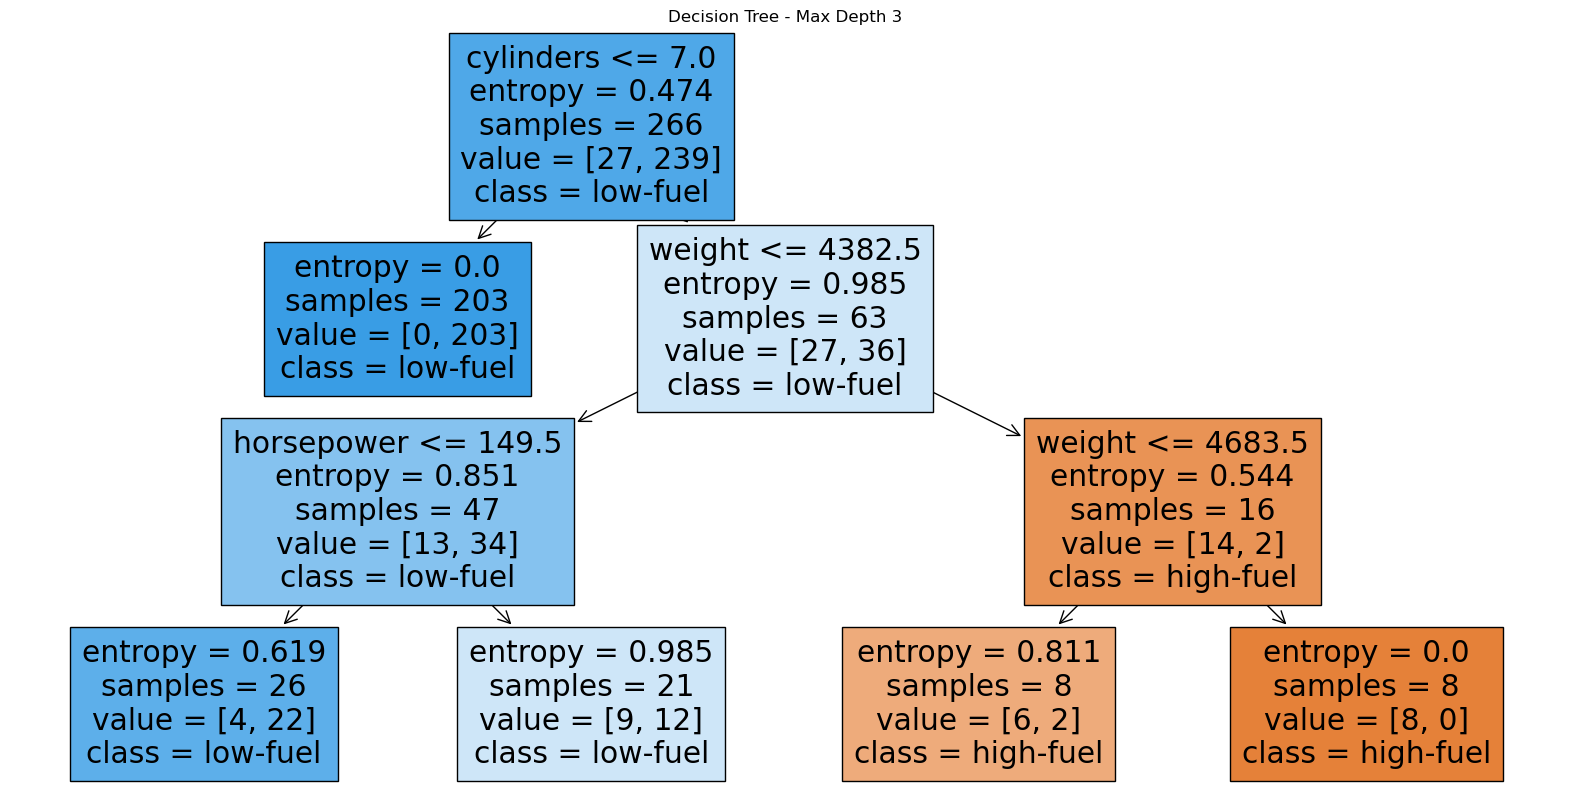

In [27]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Plot   decision tree
plt.figure(figsize=(20,10))
plot_tree(dtree, filled=True, feature_names=X.columns, class_names=['high-fuel', 'low-fuel'])
plt.title('Decision Tree - Max Depth 3')
plt.show()



In [28]:

max_depth_values = [3, 5, 8]
accuracies = []

for depth in max_depth_values:
    dtree = DecisionTreeClassifier(criterion='entropy', max_depth=depth)
    dtree.fit(X_train, y_train)
    y_pred = dtree.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

accuracies_dict = dict(zip(max_depth_values, accuracies))




In [29]:
print(accuracies_dict)

{3: 0.9122807017543859, 5: 0.9298245614035088, 8: 0.8508771929824561}


discuss the problem.....

In imbalanced datasets there is bias towards the majority class and neglect of the minority class. As such accuracy can be misleading. Alternative metrics such as precison and recall may be suggested 